<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/accuracy_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

drive  sample_data


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/2022-04-27\ 데이터

/content/drive/MyDrive/Colab Notebooks/2022-04-27 데이터


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
weather_aod_0505_0523 = pd.read_csv('./data/weather_aod_0505_0523.csv', encoding='utf-8')
weather_aod_0505_0523 = weather_aod_0505_0523.drop([weather_aod_0505_0523.columns[0], weather_aod_0505_0523.columns[1]], axis=1)
weather_aod_0505_0523

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,aod
0,05-05 00:00:00,20.561767,0.0,0.749072,98.937978,0.0,4.624748,2000.017467,21.489114,0.0
1,05-05 00:00:10,20.569543,0.0,0.470559,98.978541,0.0,1.546086,1999.916159,21.535559,0.0
2,05-05 00:00:20,20.552419,0.0,0.703899,98.920235,0.0,4.227162,2000.068799,21.542335,0.0
3,05-05 00:00:30,20.514595,0.0,0.612151,98.944682,0.0,0.331357,2000.010445,21.525727,0.0
4,05-05 00:00:40,20.556292,0.0,0.676211,99.041025,0.0,3.207824,2000.004595,21.563515,0.0
...,...,...,...,...,...,...,...,...,...,...
155516,05-22 23:59:20,21.920166,0.0,0.063679,98.978736,0.0,9.912798,1509.778732,23.579250,0.0
155517,05-22 23:59:30,22.025666,0.0,0.171538,99.084766,0.0,9.914665,1085.456078,23.545740,0.0
155518,05-22 23:59:40,21.930888,0.0,0.092957,99.040640,0.0,9.938890,1305.816996,23.582532,0.0
155519,05-22 23:59:50,22.086412,0.0,0.184221,99.034333,0.0,9.945624,793.150729,23.584564,0.0


5월13일 00:00:00 ~ 5월15일 00:00:00 예측 하기

In [6]:
# 5월13일 01:00:00 ~ 5월15일 01:00:00 날씨 (한 시간 후 날씨)
after_hour_weather_test = weather_aod_0505_0523.loc[69480:86760, 'date_time':'ground_temp']
after_hour_weather_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
69480,05-13 01:00:00,18.295168,3.427375,0.766396,99.017135,0.0,0.000000,667.116199,20.091859
69481,05-13 01:00:10,18.231045,3.215655,0.784460,99.083278,0.0,0.000000,575.407193,19.918747
69482,05-13 01:00:20,18.220456,3.649177,0.816044,99.009278,0.0,0.000000,631.939871,20.005881
69483,05-13 01:00:30,18.275483,3.618169,0.700540,99.073832,0.0,0.000000,675.847583,20.022599
69484,05-13 01:00:40,18.231558,3.226759,0.773335,99.075516,0.0,0.000000,566.454912,20.036914
...,...,...,...,...,...,...,...,...,...
86756,05-15 00:59:20,19.182648,0.469790,0.308649,98.913533,0.0,9.995291,707.788743,20.917473
86757,05-15 00:59:30,19.320643,0.343097,0.177793,99.093821,0.0,9.919687,691.625815,20.831876
86758,05-15 00:59:40,19.354419,0.600157,0.105108,98.921627,0.0,9.910140,717.962754,20.995299
86759,05-15 00:59:50,19.188275,0.725511,0.184781,99.074470,0.0,9.943697,703.216130,20.987196


In [7]:
after_hour_weather_test.to_csv('./data/after_hour_weather_test.csv')

In [8]:
after_hour_weather_test = pd.read_csv('./data/after_hour_weather_test.csv', encoding='utf-8')
after_hour_weather_test = after_hour_weather_test.drop(after_hour_weather_test.columns[0], axis=1)
after_hour_weather_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp
0,05-13 01:00:00,18.295168,3.427375,0.766396,99.017135,0.0,0.000000,667.116199,20.091859
1,05-13 01:00:10,18.231045,3.215655,0.784460,99.083278,0.0,0.000000,575.407193,19.918747
2,05-13 01:00:20,18.220456,3.649177,0.816044,99.009278,0.0,0.000000,631.939871,20.005881
3,05-13 01:00:30,18.275483,3.618169,0.700540,99.073832,0.0,0.000000,675.847583,20.022599
4,05-13 01:00:40,18.231558,3.226759,0.773335,99.075516,0.0,0.000000,566.454912,20.036914
...,...,...,...,...,...,...,...,...,...
17276,05-15 00:59:20,19.182648,0.469790,0.308649,98.913533,0.0,9.995291,707.788743,20.917473
17277,05-15 00:59:30,19.320643,0.343097,0.177793,99.093821,0.0,9.919687,691.625815,20.831876
17278,05-15 00:59:40,19.354419,0.600157,0.105108,98.921627,0.0,9.910140,717.962754,20.995299
17279,05-15 00:59:50,19.188275,0.725511,0.184781,99.074470,0.0,9.943697,703.216130,20.987196


In [13]:
# 5월13일 00:00:00 ~ 5월15일 00:00:00 (현재 발전량)
now_aod_test = weather_aod_0505_0523.loc[69120:86400, 'aod']
now_aod_test = pd.DataFrame(now_aod_test)
now_aod_test.to_csv('./data/now_aod_test.csv')

In [14]:
now_aod_test = pd.read_csv('./data/now_aod_test.csv', encoding='utf-8')
now_aod_test = now_aod_test.drop(now_aod_test.columns[0], axis=1)
now_aod_test

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [15]:
now_aod_test.columns = ['now_aod']

In [19]:
# 5월12일 23:00:00 ~ 5월14일 23:00:00 (한 시간 전 발전량)
before_hour_aod_test = weather_aod_0505_0523.loc[68760:86040, 'aod']
before_hour_aod_test = pd.DataFrame(before_hour_aod_test)
before_hour_aod_test.to_csv('./data/before_hour_aod_test.csv')

In [20]:
before_hour_aod_test = pd.read_csv('./data/before_hour_aod_test.csv', encoding='utf-8')
before_hour_aod_test = before_hour_aod_test.drop(before_hour_aod_test.columns[0], axis=1)
before_hour_aod_test

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [21]:
before_hour_aod_test.columns = ['before_aod']

In [24]:
x_test = pd.concat([after_hour_weather_test, now_aod_test, before_hour_aod_test], axis=1)
x_test

,date_time,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_aod
0,05-13 01:00:00,18.295168,3.427375,0.766396,99.017135,0.0,0.000000,667.116199,20.091859,0.0,0.0
1,05-13 01:00:10,18.231045,3.215655,0.784460,99.083278,0.0,0.000000,575.407193,19.918747,0.0,0.0
2,05-13 01:00:20,18.220456,3.649177,0.816044,99.009278,0.0,0.000000,631.939871,20.005881,0.0,0.0
3,05-13 01:00:30,18.275483,3.618169,0.700540,99.073832,0.0,0.000000,675.847583,20.022599,0.0,0.0
4,05-13 01:00:40,18.231558,3.226759,0.773335,99.075516,0.0,0.000000,566.454912,20.036914,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17276,05-15 00:59:20,19.182648,0.469790,0.308649,98.913533,0.0,9.995291,707.788743,20.917473,0.0,0.0
17277,05-15 00:59:30,19.320643,0.343097,0.177793,99.093821,0.0,9.919687,691.625815,20.831876,0.0,0.0
17278,05-15 00:59:40,19.354419,0.600157,0.105108,98.921627,0.0,9.910140,717.962754,20.995299,0.0,0.0
17279,05-15 00:59:50,19.188275,0.725511,0.184781,99.074470,0.0,9.943697,703.216130,20.987196,0.0,0.0


In [27]:
X_test = x_test.loc[:, 'temperature':]
X_test = np.array(X_test)

In [33]:
# 5월13일 01:00:00 ~ 5월15일 01:00:00 (예측해야할 발전량)
y_test = weather_aod_0505_0523.loc[69480:86760, 'aod']
y_test = pd.DataFrame(y_test)
y_test.to_csv('./data/y_test_test.csv')

In [38]:
y_test = pd.read_csv('./data/y_test_test.csv', encoding='utf-8')
y_test = y_test.drop(y_test.columns[0], axis=1)
y_test = np.array(y_test)
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [29]:
import pickle

In [30]:
# 모델 불러오기
with open('LinearRegression_s_pred_model.pickle', 'rb') as f:
    s_model = pickle.load(f)

In [40]:
test_pred = s_model.predict(X_test)

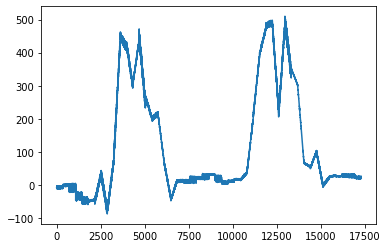

In [41]:
plt.plot(test_pred)

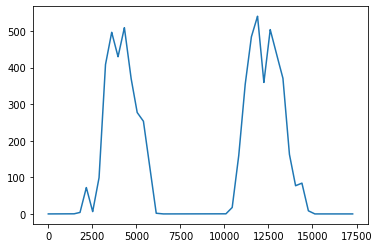

In [42]:
plt.plot(y_test)

In [43]:
s_model.score(X_test,y_test)

0.8222574867015146